# Import Libraries

In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Load Data

In [2]:
parent_path = 'D:\Programs\DeepLearing\Stock_prize_Prediction\Data'
Data_file_paths = [f'{parent_path}\{i}' for i in os.listdir(parent_path)]
Data_file_paths

['D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual ).csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual )_clean.csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Stocks.xlsx',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100).csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100)_clean.csv']

In [3]:
clean_datasets = [i for i in Data_file_paths if i.endswith('_clean.csv')]
Stocks_excel_file = [i for i in Data_file_paths if i.endswith('.xlsx')][0]
print(clean_datasets,Stocks_excel_file,sep='\n')

['D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual )_clean.csv', 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100)_clean.csv']
D:\Programs\DeepLearing\Stock_prize_Prediction\Data\Stocks.xlsx


## Reading Data and Adjusting Settings

### Common Preprocessing and Analysis functions

In [4]:
def Plot_inactive_years(df):
    nan_counts = df.isnull().sum()
    nan_counts_years = nan_counts[[str(i) for i in range(1960,2022)]]
    plt.figure(figsize=(12,6))
    sns.barplot(x=nan_counts_years.index, y=nan_counts_years.values)
    plt.xticks(rotation=90)
    plt.xlabel("Years")
    plt.ylabel("Count of NaN Values")
    plt.title("# of inactive countries in each year")
    plt.show()
    
def Plot_Line_plot_multiple_cols(df,cols):
    for col in cols:
        marker = np.random.choice(['o', 's', '^', 'D',"v","2","1"])
        plt.plot(df.index, df[col], label=col.upper(), marker=marker)
    plt.legend()
    plt.show()
    
    
def Row_wise_describe(df):
    return df.apply(pd.Series.describe, axis=1)

def N_largest_rows(df,n):
    return df.apply(lambda x: x.nlargest(n), axis=0)

### Infliation Data (*Inflation, consumer prices (annual %)*)

In [5]:
df_wholesale = pd.read_csv(clean_datasets[1])
df_wholesale.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,117.84078,127.720199,136.296423,148.795847,179.139391,220.380593,NaN,NaN,NaN,NaN


#### Infliation Preprocessing

##### Small Intisites on the data about ⬇️
1. Total how many countries data do we have?
2. How many years data do we have?

In [6]:
print(f'1. Total how many countries data do we have? --> {df_wholesale.shape[0]}\n2. How many years data do we have? --> {df_wholesale.shape[1]-4} ')

1. Total how many countries data do we have? --> 266
2. How many years data do we have? --> 62 


**Lets check active trade years of all the countries**

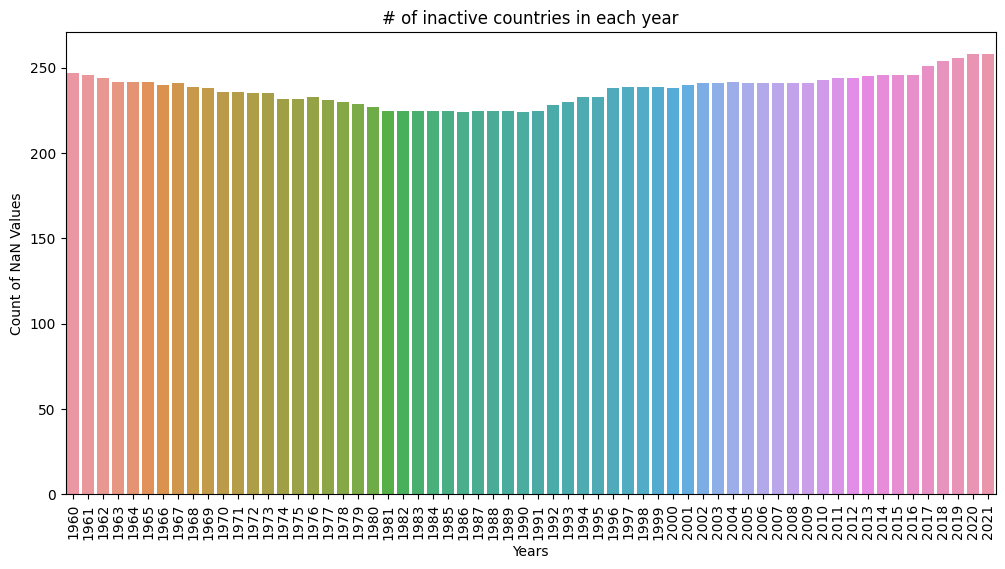

In [7]:
Plot_inactive_years(df_wholesale)

##### **--> After observing the above ⬆️ figure we decided to choose to select a range of year for our analysis.**

*We are just considering data from year 2000 in both infilation data*

In [8]:
df_wholesale.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [9]:
valid_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+[str(i) for i in range(2000,2022)]
df_wholesale = df_wholesale[valid_cols]

In [10]:
df_wholesale.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Wholesale price index (2010 = 100),FP.WPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,117.84078,127.720199,136.296423,148.795847,179.139391,220.380593,NaN,NaN,NaN,NaN


**Still we have few countries which are inactive for these 22 years as we considering so lets drop those countries.**

In [11]:
df_wholesale = df_wholesale.dropna()
df_wholesale.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
14,Austria,AUT,Wholesale price index (2010 = 100),FP.WPI.TOTL,81.476060,82.689306,82.390498,83.720552,87.867358,89.675025,...,110.884056,109.662795,107.530816,103.761336,101.342225,106.050398,110.499129,110.451630,105.902236,116.889593
29,Brazil,BRA,Wholesale price index (2010 = 100),FP.WPI.TOTL,40.075644,45.125923,52.645415,67.152476,74.176796,78.305613,...,115.887835,122.755629,128.317772,136.117387,151.699815,150.576010,161.017945,172.284923,203.236042,275.210971
109,India,IND,Wholesale price index (2010 = 100),FP.WPI.TOTL,58.530450,61.549853,63.072321,66.430050,70.818717,73.795819,...,117.472033,123.832178,127.984690,123.005392,122.940363,127.167193,132.592399,135.091338,135.815937,150.437981
184,Pakistan,PAK,Wholesale price index (2010 = 100),FP.WPI.TOTL,39.290284,41.081307,42.306990,45.080519,48.888957,53.153555,...,127.272369,137.183963,143.727687,140.108114,142.453404,147.398502,159.601892,180.012388,112.680894,114.654541
187,Philippines,PHL,Wholesale price index (2010 = 100),FP.WPI.TOTL,54.967861,59.239762,62.213662,65.286144,70.761571,78.767277,...,109.908425,111.794872,115.714286,117.619048,118.699634,120.934066,123.287546,125.311355,128.315018,132.252747


##### How many countries data is there after preprocessing ⬇️
1. Total how many countries data do we have?
2. How many years data do we have?

In [12]:
print(f'1. Total how many countries data do we have? --> {df_wholesale.shape[0]}\n2. How many years data do we have? --> {df_wholesale.shape[1]-4} ')

1. Total how many countries data do we have? --> 7
2. How many years data do we have? --> 22 


### WholeSale Data (*Wholesale price index (2010 = 100)*)

In [13]:
describe_wholesale = Row_wise_describe(df_wholesale.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],axis=1))
describe_wholesale.set_index(df_wholesale['Country Code'],inplace=True)
describe_wholesale

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
AUT,22.0,99.287485,10.908211,81.476060,90.329471,101.784442,108.113784,116.889593
BRA,22.0,115.259126,55.727633,40.075644,78.464005,104.722392,146.961354,275.210971
IND,22.0,101.842848,29.121840,58.530450,74.870957,104.735277,126.333439,150.437981
PAK,22.0,98.905873,45.040369,39.290284,54.282608,106.340447,139.377076,180.012388
PHL,22.0,98.643024,24.552013,54.967861,80.421612,104.331502,118.429487,132.252747
SAU,22.0,102.581599,19.820986,79.354508,85.122097,102.126025,110.040712,150.581071
SGP,22.0,94.408408,9.620695,80.732679,86.519007,92.807327,102.741799,110.905886


##### Top 5 Countries with Max infliation in 22 years

In [14]:
top_5_max = describe_wholesale.nlargest(5,'max')
top_5_max

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
BRA,22.0,115.259126,55.727633,40.075644,78.464005,104.722392,146.961354,275.210971
PAK,22.0,98.905873,45.040369,39.290284,54.282608,106.340447,139.377076,180.012388
SAU,22.0,102.581599,19.820986,79.354508,85.122097,102.126025,110.040712,150.581071
IND,22.0,101.842848,29.121840,58.530450,74.870957,104.735277,126.333439,150.437981
PHL,22.0,98.643024,24.552013,54.967861,80.421612,104.331502,118.429487,132.252747


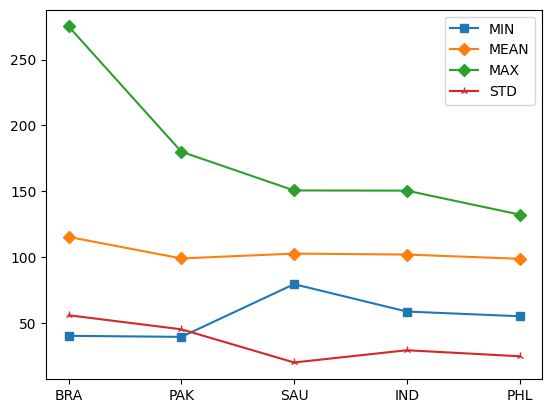

In [15]:
Plot_Line_plot_multiple_cols(top_5_max,['min','mean','max','std'])

##### Top 5 Countries with Min infliation in 22 years

In [16]:
top_5_min = describe_wholesale.nlargest(5,'min')
top_5_min

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
AUT,22.0,99.287485,10.908211,81.476060,90.329471,101.784442,108.113784,116.889593
SGP,22.0,94.408408,9.620695,80.732679,86.519007,92.807327,102.741799,110.905886
SAU,22.0,102.581599,19.820986,79.354508,85.122097,102.126025,110.040712,150.581071
IND,22.0,101.842848,29.121840,58.530450,74.870957,104.735277,126.333439,150.437981
PHL,22.0,98.643024,24.552013,54.967861,80.421612,104.331502,118.429487,132.252747


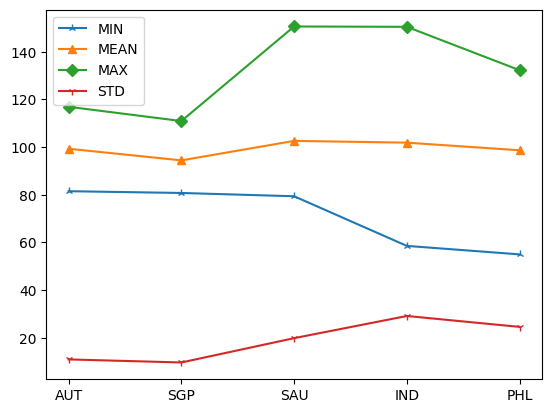

In [17]:
Plot_Line_plot_multiple_cols(top_5_min,['min','mean','max','std'])

In [18]:
box_plt_df = df_wholesale.drop(['Country Name', 'Indicator Name', 'Indicator Code'],axis=1)
box_plt_df_melted = box_plt_df.melt(id_vars='Country Code', var_name='Year', value_name='Value')
box_plt_df_melted.head()

,Country Code,Year,Value
0,AUT,2000,81.476060
1,BRA,2000,40.075644
2,IND,2000,58.530450
3,PAK,2000,39.290284
4,PHL,2000,54.967861


In [19]:
box_plt_df_melted.rename(columns={'Country Code': 'Country_Code'}, inplace=True)

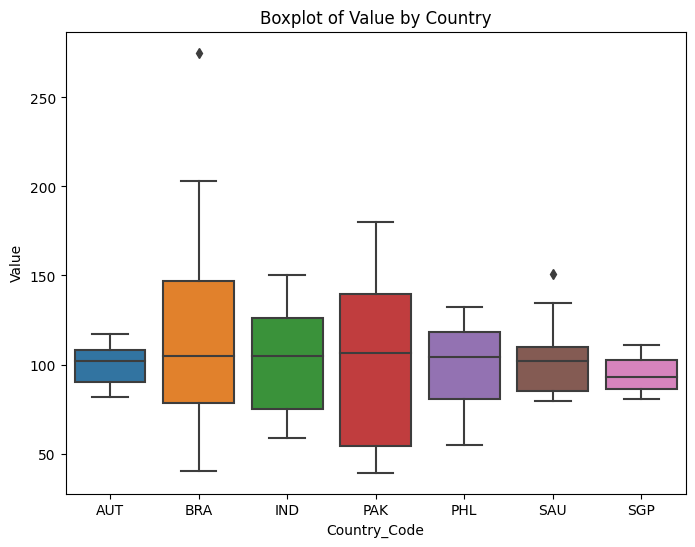

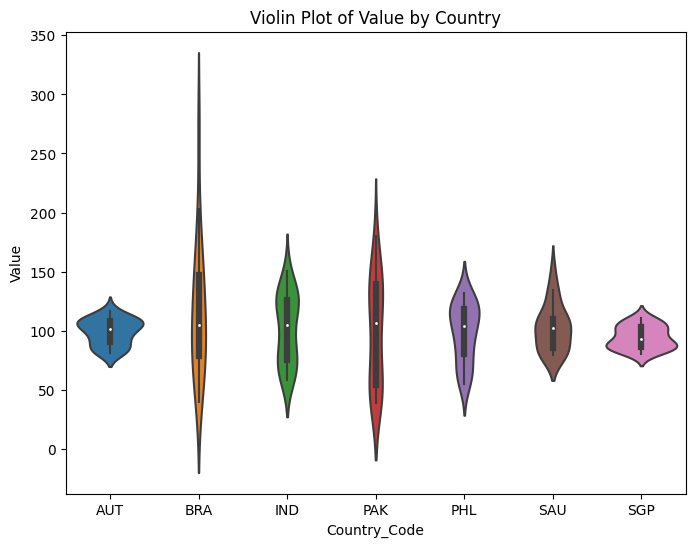

c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

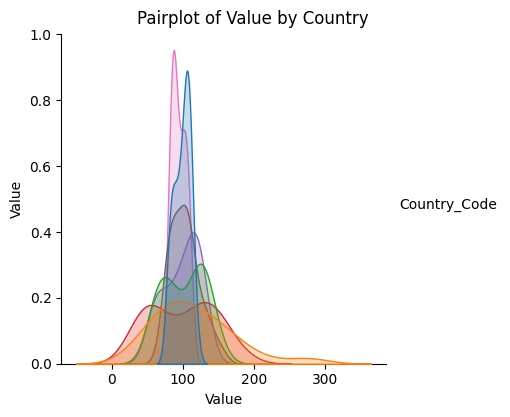

Descriptive Statistics:
              count        mean        std        min        25%         50%  \
Country_Code                                                                   
AUT            22.0   99.287485  10.908211  81.476060  90.329471  101.784442   
BRA            22.0  115.259126  55.727633  40.075644  78.464005  104.722392   
IND            22.0  101.842848  29.121840  58.530450  74.870957  104.735277   
PAK            22.0   98.905873  45.040369  39.290284  54.282608  106.340447   
PHL            22.0   98.643024  24.552013  54.967861  80.421612  104.331502   
SAU            22.0  102.581599  19.820986  79.354508  85.122097  102.126025   
SGP            22.0   94.408408   9.620695  80.732679  86.519007   92.807327   

                     75%         max  
Country_Code                          
AUT           108.113784  116.889593  
BRA           146.961354  275.210971  
IND           126.333439  150.437981  
PAK           139.377076  180.012388  
PHL           118.429

In [35]:
df = box_plt_df_melted.copy()

# Descriptive Statistics
descriptive_stats = df.groupby('Country_Code')['Value'].describe()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country_Code', y='Value', data=df)
plt.title('Boxplot of Value by Country')
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country_Code', y='Value', data=df)
plt.title('Violin Plot of Value by Country')
plt.show()

# Pairplot
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue='Country_Code', vars=['Value'], height=4)
plt.suptitle('Pairplot of Value by Country', y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = df.corr()

# Display descriptive statistics and correlation matrix
print('Descriptive Statistics:')
print(descriptive_stats)
print('\nCorrelation Matrix:')
print(correlation_matrix)

In [20]:

groups=[]
contry_codes = box_plt_df_melted['Country_Code'].unique()
for contry in contry_codes:
    groups.append(box_plt_df_melted[box_plt_df_melted['Country_Code']==contry]['Value'].to_list())


In [21]:
import scipy.stats as stats


# Perform the one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# If the p-value is less than 0.05, then there is a significant difference between the groups
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


F-statistic: 0.930534086108106
p-value: 0.4749810099618409
There is no significant difference between the groups.


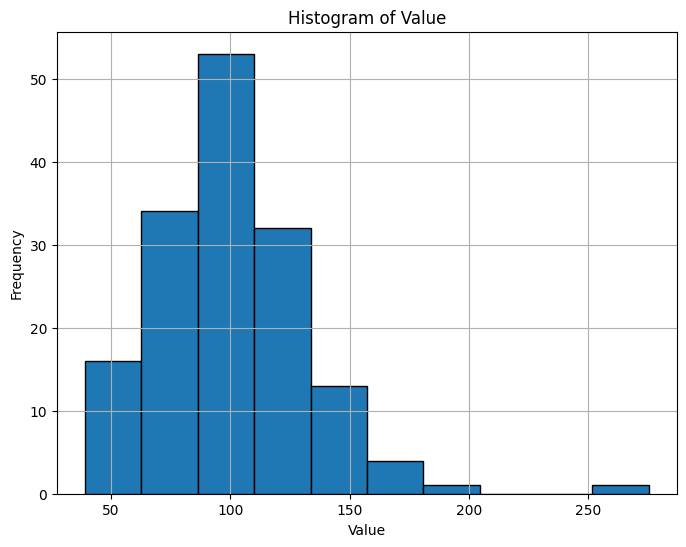

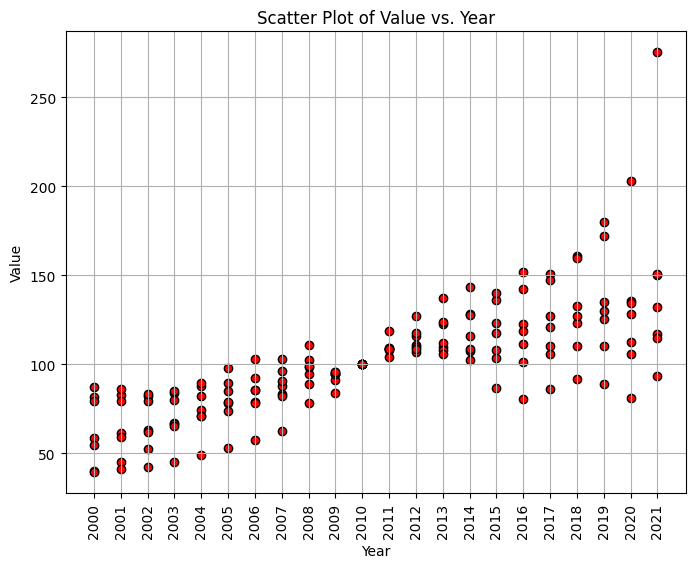

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(box_plt_df_melted["Value"], bins=10, edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Value")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(box_plt_df_melted["Year"], box_plt_df_melted["Value"], c="red", edgecolors="black")
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(rotation="vertical")
plt.title("Scatter Plot of Value vs. Year")
plt.grid(True)
plt.show()



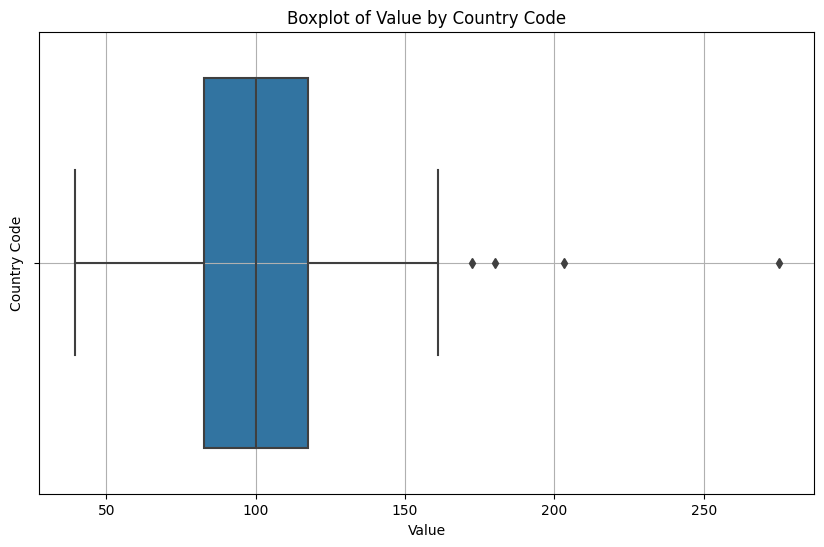

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_plt_df_melted,x='Value',hue='Country_Code')
plt.xlabel("Value")
plt.ylabel("Country Code")
plt.title("Boxplot of Value by Country Code")
plt.grid(True)
plt.show()

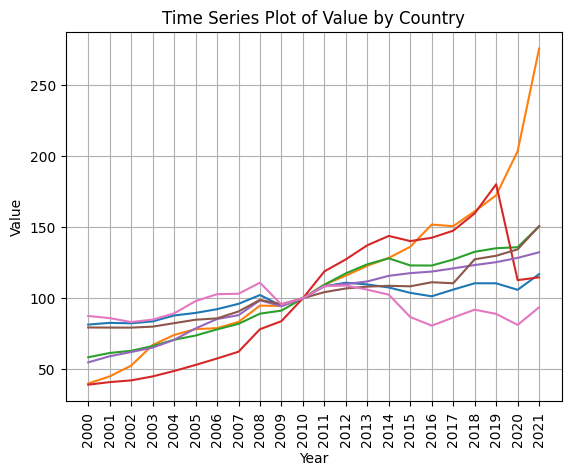

In [24]:
for country in box_plt_df_melted["Country_Code"].unique():
    country_data = box_plt_df_melted[box_plt_df_melted["Country_Code"] == country]
    plt.plot(country_data["Year"], country_data["Value"], label=country)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Time Series Plot of Value by Country")
plt.grid(True)
plt.xticks(rotation='vertical')
plt.show()


Correlation Matrix:


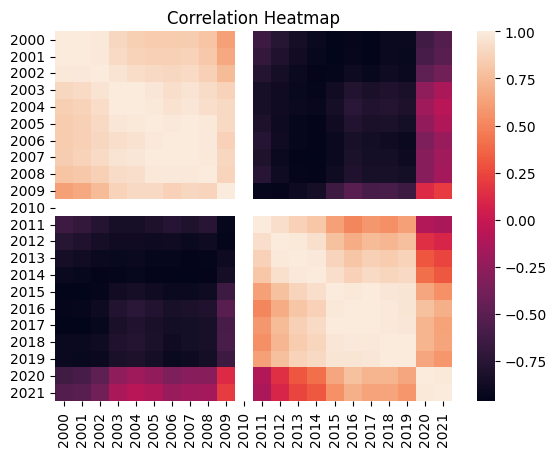

In [25]:
correlations = df_wholesale.corr()
print("Correlation Matrix:")
#print(correlations)

# Create a heatmap to visualize the correlations
sns.heatmap(correlations)
plt.title("Correlation Heatmap")
plt.show()

##### Regression Analysis

Mean Squared Error: 264.4530586038863
Intercept: -7527.59123280736
Slope: [3.79482099]


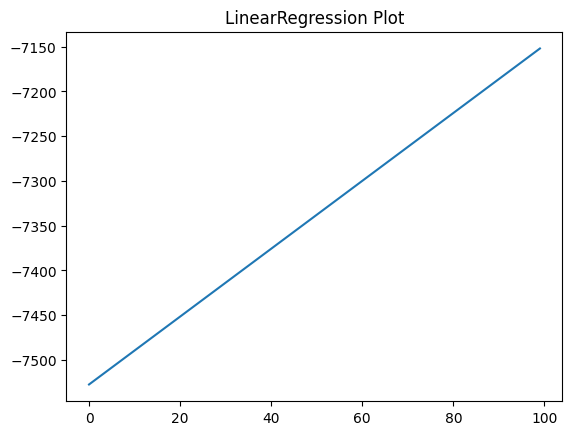

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a DataFrame from the provided data
data = box_plt_df_melted.copy()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["Year"], data["Value"], test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate the model's performance

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the model's coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

sns.lineplot(data=[model.coef_[0]*i+model.intercept_ for i in range(100)])
plt.title('LinearRegression Plot')
plt.show()

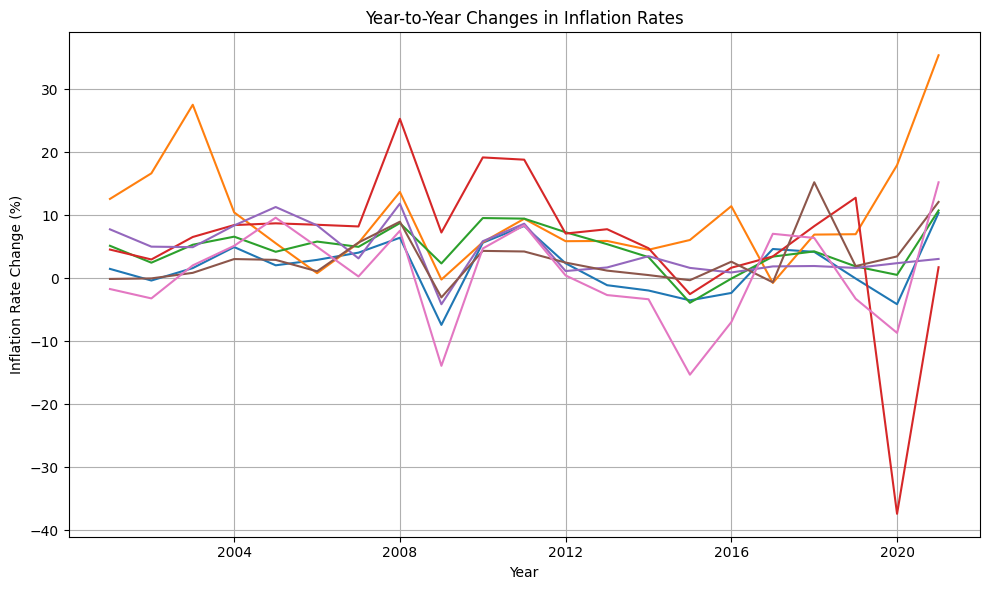

In [27]:
df = box_plt_df_melted.copy()

# Convert 'Year' column to datetime type for proper sorting
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Sort the DataFrame by 'Country Name' and 'Year'
df.sort_values(by=['Country_Code', 'Year'], inplace=True)

# Calculate year-to-year changes
df['Inflation Rate Change'] = df.groupby('Country_Code')['Value'].pct_change() * 100

# Plot the results
plt.figure(figsize=(10, 6))  # Adjust the figure size to a smaller value
for country, country_df in df.groupby('Country_Code'):
    plt.plot(country_df['Year'], country_df['Inflation Rate Change'], label=country)

plt.title('Year-to-Year Changes in Inflation Rates')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Change (%)')
#plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the layout to prevent cropping of the plot
plt.show()



In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

df = box_plt_df_melted.copy()
contingency_table = pd.crosstab(df['Country_Code'], df['Year'])

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Contingency Table:")
print(contingency_table)

Chi2 Stat: 0.0
P-value: 1.0
Degrees of Freedom: 126
Contingency Table:
Year          2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
Country_Code                                                              ...   
AUT              1     1     1     1     1     1     1     1     1     1  ...   
BRA              1     1     1     1     1     1     1     1     1     1  ...   
IND              1     1     1     1     1     1     1     1     1     1  ...   
PAK              1     1     1     1     1     1     1     1     1     1  ...   
PHL              1     1     1     1     1     1     1     1     1     1  ...   
SAU              1     1     1     1     1     1     1     1     1     1  ...   
SGP              1     1     1     1     1     1     1     1     1     1  ...   

Year          2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  
Country_Code                                                              
AUT              1     1     1     1     1     1 

In [33]:
box_plt_df_melted.head()


,Country_Code,Year,Value
0,AUT,2000,81.476060
1,BRA,2000,40.075644
2,IND,2000,58.530450
3,PAK,2000,39.290284
4,PHL,2000,54.967861


     Country_Code       Value  Value Lag 1  Value Lag 2
Year                                                   
2000          AUT   81.476060          NaN          NaN
2000          BRA   40.075644    81.476060          NaN
2000          IND   58.530450    40.075644    81.476060
2000          PAK   39.290284    58.530450    40.075644
2000          PHL   54.967861    39.290284    58.530450
...           ...         ...          ...          ...
2021          IND  150.437981   275.210971   116.889593
2021          PAK  114.654541   150.437981   275.210971
2021          PHL  132.252747   114.654541   150.437981
2021          SAU  150.581071   132.252747   114.654541
2021          SGP   93.646536   150.581071   132.252747

[154 rows x 4 columns]


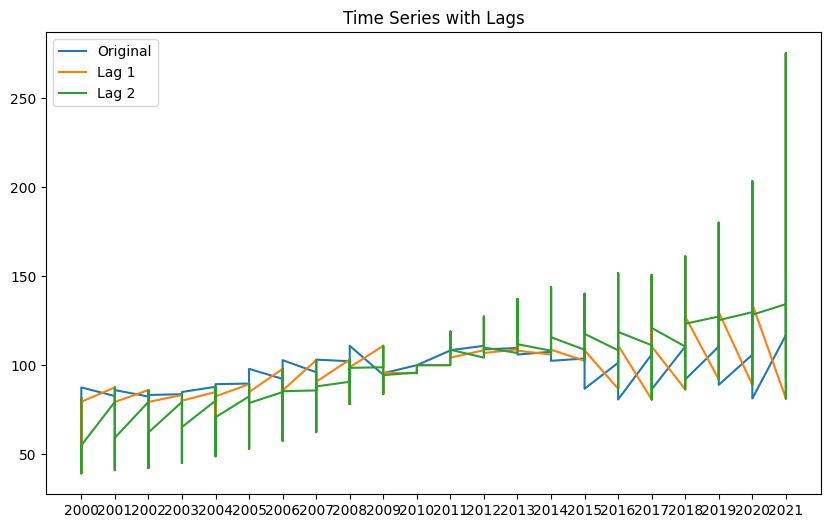

ADF Test on Original Time Series:
ADF Statistic: 0.19996614018503955
p-value: 0.9722596947767018
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}

ADF Test on First-order Difference:
ADF Statistic: -4.211877384622037
p-value: 0.0006290519257192663
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}


In [34]:
from statsmodels.tsa.stattools import adfuller
df = box_plt_df_melted.copy()
df.set_index('Year', inplace=True)

# Lag Analysis
df['Value Lag 1'] = df['Value'].shift(1)
df['Value Lag 2'] = df['Value'].shift(2)

# Display the DataFrame with lag columns
print(df)

# Plot the time series with lags
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original')
plt.plot(df['Value Lag 1'], label='Lag 1')
plt.plot(df['Value Lag 2'], label='Lag 2')
plt.legend()
plt.title('Time Series with Lags')
plt.show()

# Stationarity Check using Augmented Dickey-Fuller Test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Perform ADF test on the original time series
print('ADF Test on Original Time Series:')
adf_test(df['Value'])

# Perform ADF test on the first-order difference (lag 1)
print('\nADF Test on First-order Difference:')
adf_test(df['Value'].diff().dropna())

# Analysis

### Descriptive Analysis

### Statistical Analysis

### Correlation Analysis

### Lag Analysis and Stationarity Checks